<a href="https://colab.research.google.com/github/manashpratim/Pulsar-Star-Prediction/blob/master/Pulsar_Star_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Downloading the datasets
!wget --no-check-certificate \
        "https://storage.googleapis.com/kaggle-datasets/25855/32949/pulsar_stars.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561910798&Signature=keZjaFO9ah4oQCiUgZW9wEQZ5PGnQfceSuFHD74J1dOCFTWBYiLFumBEWw3Jqh106sT3QH0bv6uMe91WSylc7Tg%2F6c7c36d%2BgIQkr1dXj8SdPM75Nqu%2BqHTZG9CT8zmx6IShSBHNJvWGoqvztOAjj6jxs172i8bKrTN6zzDyu8pEkrMYyfScpsY%2FnAfVHbWYtOq4rSMnWute8Cmxyx0F6BI0mQAwzvV0by9PgqQBRL8Cwni%2BgtDZmDFpMzLOn8lIQqtYj6Ea4zTvImoaE38rU%2FOYfQiIMRP7jFTVuvfc8LjPi0BEqsLuZCvtxsbDEofnwRFfHmO%2Fq2DS%2BTLS%2BlwnPQ%3D%3D"\
        -O "/tmp/pulsar_stars.zip"

--2019-06-27 16:07:55--  https://storage.googleapis.com/kaggle-datasets/25855/32949/pulsar_stars.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561910798&Signature=keZjaFO9ah4oQCiUgZW9wEQZ5PGnQfceSuFHD74J1dOCFTWBYiLFumBEWw3Jqh106sT3QH0bv6uMe91WSylc7Tg%2F6c7c36d%2BgIQkr1dXj8SdPM75Nqu%2BqHTZG9CT8zmx6IShSBHNJvWGoqvztOAjj6jxs172i8bKrTN6zzDyu8pEkrMYyfScpsY%2FnAfVHbWYtOq4rSMnWute8Cmxyx0F6BI0mQAwzvV0by9PgqQBRL8Cwni%2BgtDZmDFpMzLOn8lIQqtYj6Ea4zTvImoaE38rU%2FOYfQiIMRP7jFTVuvfc8LjPi0BEqsLuZCvtxsbDEofnwRFfHmO%2Fq2DS%2BTLS%2BlwnPQ%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789928 (771K) [application/zip]
Saving to: ‘/tmp/pulsar_stars.zip’

/tmp/pulsar_stars.z 100%[===================>] 771.41K  --.-KB/s    in 0.006s  

2019-06-27 16:07:56 (117 MB/s) - ‘/tm

In [0]:
# Unzipping the downloaded dataset
import os
import zipfile

local_zip='/tmp/pulsar_stars.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/pulsar_stars')
zip_ref.close()

In [0]:
import pandas as pd
df=pd.read_csv('/tmp/pulsar_stars/pulsar_stars.csv')

In [24]:
df.head(5)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [25]:
df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

# Clearly, this dataset has humongous class imbalance

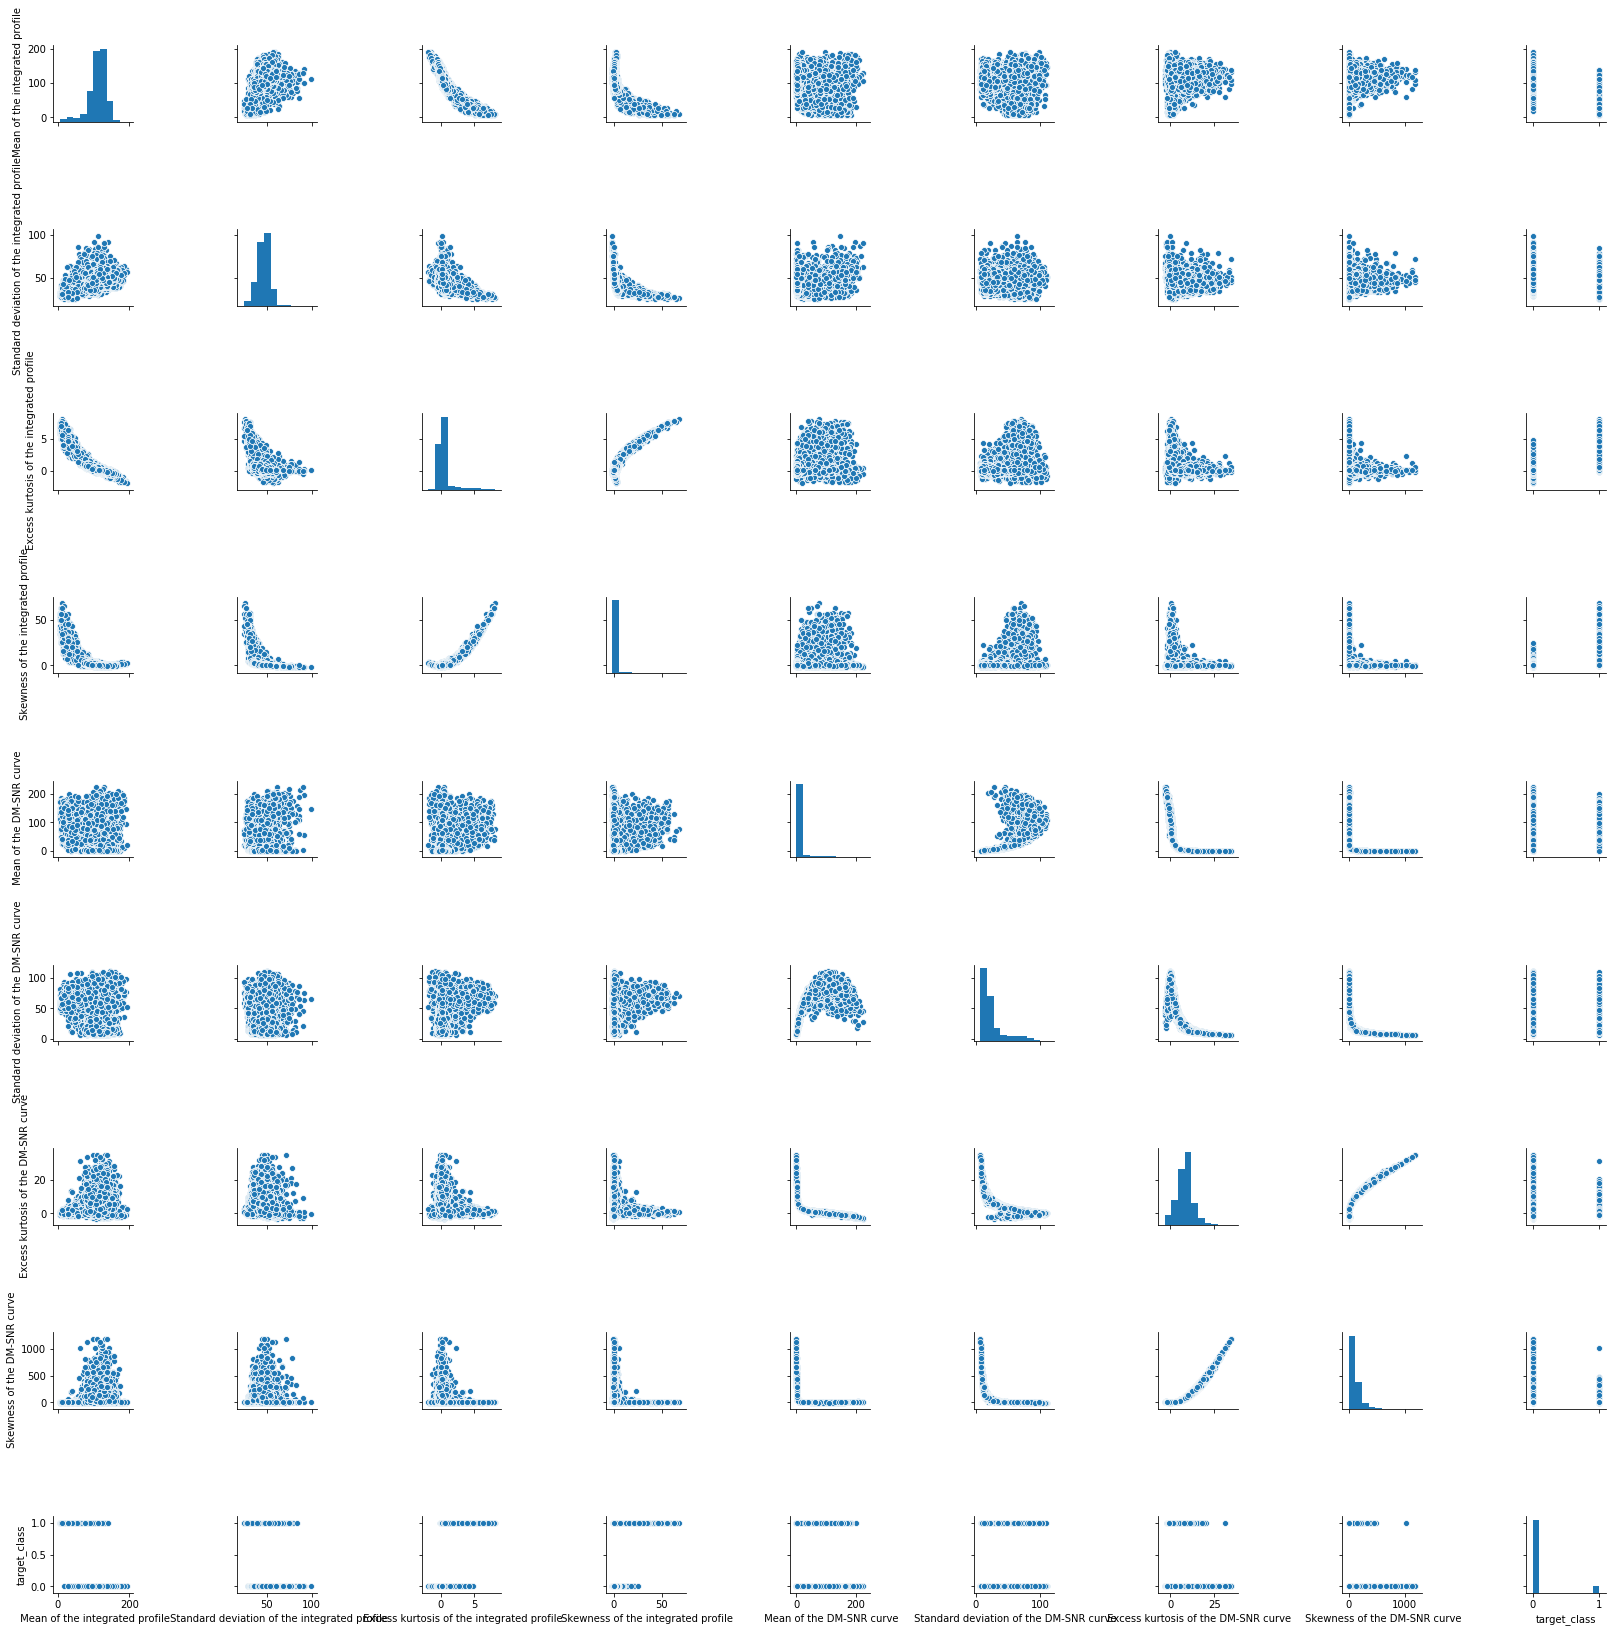

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df)

In [0]:
x=df.drop(['target_class'],axis=1)
y=df['target_class']

In [30]:
x.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve',
       ' Skewness of the DM-SNR curve'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# **Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression

logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
predictions1=logmodel.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3248
           1       0.94      0.84      0.89       332

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [42]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: ',confusion_matrix(y_test,predictions1))

Confusion Matrix:  [[3230   18]
 [  54  278]]


In [0]:
from sklearn.metrics import confusion_matrix
import numpy as np
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    """if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)"""

    fig, ax = plt.subplots(figsize=(4, 4))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

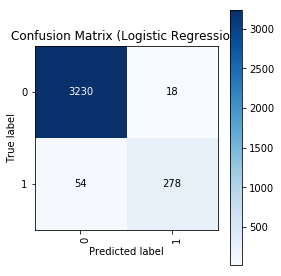

In [40]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, predictions1, classes=[0,1],
                      title='Confusion Matrix (Logistic Regression)')

# **Decision Tree Classifier**

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
predictions2=dtree.predict(x_test)

In [43]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3248
           1       0.82      0.82      0.82       332

    accuracy                           0.97      3580
   macro avg       0.90      0.90      0.90      3580
weighted avg       0.97      0.97      0.97      3580



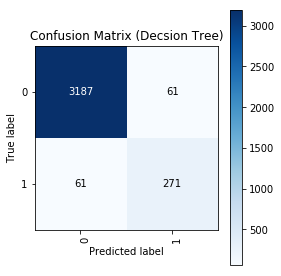

In [44]:
plot_confusion_matrix(y_test, predictions2, classes=[0,1],
                      title='Confusion Matrix (Decsion Tree)')

**Performance of Decision Tree is slightly inferior compared to Logistic Regression**

# **Support Vector Machines**

In [53]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
predictions4=svm.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [54]:
print(classification_report(y_test,predictions4))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3248
           1       0.86      0.02      0.04       332

    accuracy                           0.91      3580
   macro avg       0.88      0.51      0.49      3580
weighted avg       0.90      0.91      0.87      3580



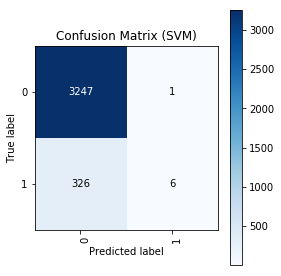

In [57]:
plot_confusion_matrix(y_test, predictions4, classes=[0,1],
                      title='Confusion Matrix (SVM)')

**SVM is abysmal in predicting the minority class**

# **Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
predictions3=rfc.predict(x_test)

In [49]:
print(classification_report(y_test,predictions3))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3248
           1       0.94      0.86      0.90       332

    accuracy                           0.98      3580
   macro avg       0.96      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



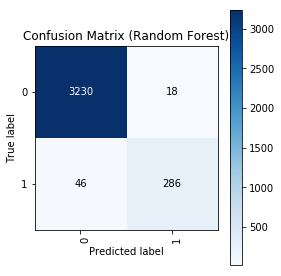

In [50]:
plot_confusion_matrix(y_test, predictions3, classes=[0,1],
                      title='Confusion Matrix (Random Forest)')

**Random Forest Classifier performs slightly better than Logistic Regression in classifying the minority class**

# **Convolutional Neural Network**

In [85]:
#Expanding the dimensions of train and test data
train_x=np.expand_dims(x_train, axis=3)
test_x=np.expand_dims(x_test, axis=3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


In [0]:
import tensorflow as tf
from tensorflow import keras
model_conv = tf.keras.Sequential([
    tf.keras.layers.Conv1D(16,3,activation='relu',input_shape=(8,1)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [91]:
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history=model_conv.fit(train_x, y_train, epochs=num_epochs, validation_split=0.1)

Train on 12886 samples, validate on 1432 samples
Epoch 1/10
12886/12886 [==============================] - 1s 68us/sample - loss: 0.2599 - acc: 0.9142 - val_loss: 0.1524 - val_acc: 0.9288
Epoch 2/10
12886/12886 [==============================] - 1s 51us/sample - loss: 0.1558 - acc: 0.9299 - val_loss: 0.1193 - val_acc: 0.9483
Epoch 3/10
12886/12886 [==============================] - 1s 51us/sample - loss: 0.1450 - acc: 0.9438 - val_loss: 0.1125 - val_acc: 0.9567
Epoch 4/10
12886/12886 [==============================] - 1s 49us/sample - loss: 0.1401 - acc: 0.9516 - val_loss: 0.1107 - val_acc: 0.9609
Epoch 5/10
12886/12886 [==============================] - 1s 47us/sample - loss: 0.1318 - acc: 0.9554 - val_loss: 0.1073 - val_acc: 0.9679
Epoch 6/10
12886/12886 [==============================] - 1s 49us/sample - loss: 0.1293 - acc: 0.9581 - val_loss: 0.0965 - val_acc: 0.9756
Epoch 7/10
12886/12886 [==============================] - 1s 50us/sample - loss: 0.1231 - acc: 0.9601 - val_loss: 0.0

<Figure size 432x288 with 0 Axes>

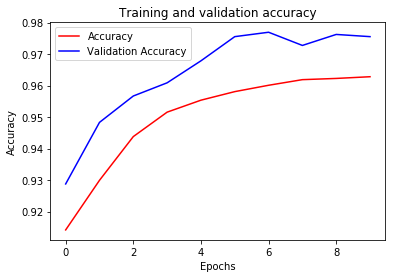

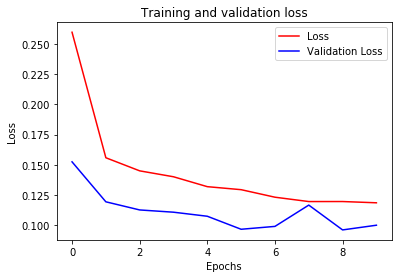

<Figure size 432x288 with 0 Axes>

In [92]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

In [0]:
pred_prob_test_labels=model_conv.predict(test_x)
predictions4=[]
for i in range(len(pred_prob_test_labels)):
  predictions4.append(np.argmax(pred_prob_test_labels[i]))

In [94]:
print(classification_report(y_test,predictions4))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3248
           1       0.00      0.00      0.00       332

    accuracy                           0.91      3580
   macro avg       0.45      0.50      0.48      3580
weighted avg       0.82      0.91      0.86      3580



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


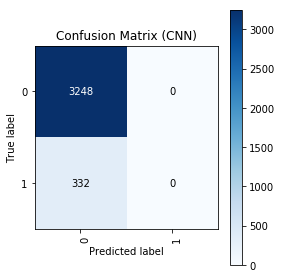

In [103]:
plot_confusion_matrix(y_test, predictions4, classes=[0,1],
                      title='Confusion Matrix (CNN)')

**While CNN classified the dominant class with 100% accuracy, it failed to classify even a single instance from the minority class**

# **Artificial Neural Network**

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6,activation='relu',input_dim=8),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [100]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history=model.fit(x_train, y_train, epochs=num_epochs, validation_split=0.1)

Train on 12886 samples, validate on 1432 samples
Epoch 1/10
12886/12886 [==============================] - 1s 56us/sample - loss: 0.4216 - acc: 0.9614 - val_loss: 0.2125 - val_acc: 0.9665
Epoch 2/10
12886/12886 [==============================] - 1s 40us/sample - loss: 0.1394 - acc: 0.9705 - val_loss: 0.1349 - val_acc: 0.9679
Epoch 3/10
12886/12886 [==============================] - 1s 40us/sample - loss: 0.1220 - acc: 0.9708 - val_loss: 0.1227 - val_acc: 0.9707
Epoch 4/10
12886/12886 [==============================] - 1s 41us/sample - loss: 0.1141 - acc: 0.9721 - val_loss: 0.1244 - val_acc: 0.9707
Epoch 5/10
12886/12886 [==============================] - 1s 41us/sample - loss: 0.1098 - acc: 0.9718 - val_loss: 0.1090 - val_acc: 0.9707
Epoch 6/10
12886/12886 [==============================] - 1s 42us/sample - loss: 0.1048 - acc: 0.9737 - val_loss: 0.1300 - val_acc: 0.9714
Epoch 7/10
12886/12886 [==============================] - 1s 41us/sample - loss: 0.1019 - acc: 0.9734 - val_loss: 0.1

In [0]:
pred_prob_test_labels1=model.predict(x_test)
predictions6=[]
for i in range(len(pred_prob_test_labels1)):
  predictions6.append(np.argmax(pred_prob_test_labels1[i]))

In [108]:
print(classification_report(y_test,predictions6))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3248
           1       0.00      0.00      0.00       332

    accuracy                           0.91      3580
   macro avg       0.45      0.50      0.48      3580
weighted avg       0.82      0.91      0.86      3580



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


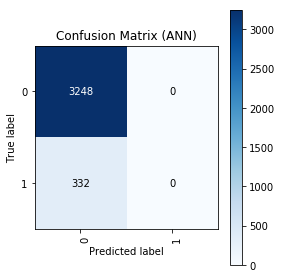

In [109]:
plot_confusion_matrix(y_test, predictions4, classes=[0,1],
                      title='Confusion Matrix (ANN)')

**Same story with ANN. It could not classify the minority class**